1. Implement the intensity transformation depicted in Fig. 1a on the image shown in Fig. 1b. 

<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
C:\Users\pasin\AppData\Local\Temp\ipykernel_7892\2767973296.py:24: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


51
100
105
256


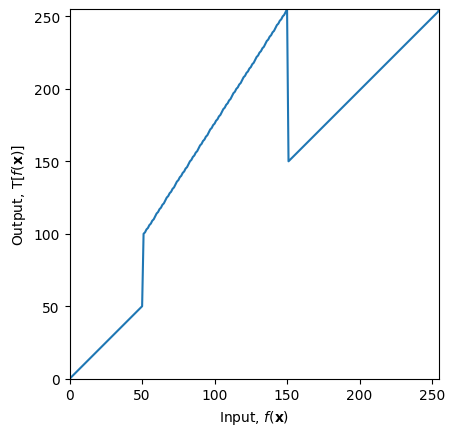

C:\Users\pasin\AppData\Local\Temp\ipykernel_7892\2767973296.py:24: SyntaxWarning: invalid escape sequence '\m'
  ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')


error: OpenCV(4.11.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:973: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [1]:
# Intensity Windowing
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# breaking points in the piecewise linear transformation
c1 = np.array([(50, 50), (50, 100), (150, 255), (150, 150)])

# linspace ( starting point, ending point, number of points)
t1 = np.linspace(0, 50, num=51 ).astype('uint8')
print(len(t1))
t2 = np.linspace(100, 255, num=100).astype('uint8')
print(len(t2))
t3 = np.linspace(150, 255, num= 105).astype('uint8')
print(len(t3)) 
 
transform = np.concatenate((t1, t2), axis=0).astype('uint8')
transform = np.concatenate((transform, t3), axis=0).astype('uint8')
print(len(transform))

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output, $\mathrm{T}[f(\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal') 
plt.show()


img_orig = cv.imread('images/emma.jpg', cv.IMREAD_GRAYSCALE)
cv.namedWindow("Image", cv.WINDOW_AUTOSIZE)
cv.imshow("Image", img_orig)
cv.waitKey(0)
image_transformed = cv.LUT(img_orig, transform)
cv.imshow("Image", image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()